In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
wine =  pd.read_csv("winequality-white.csv", sep=';')
display(wine.head(5))
print(wine.info())
#print(wine.isna().sum())  #No null value in the dataset was confirmed.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [78]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


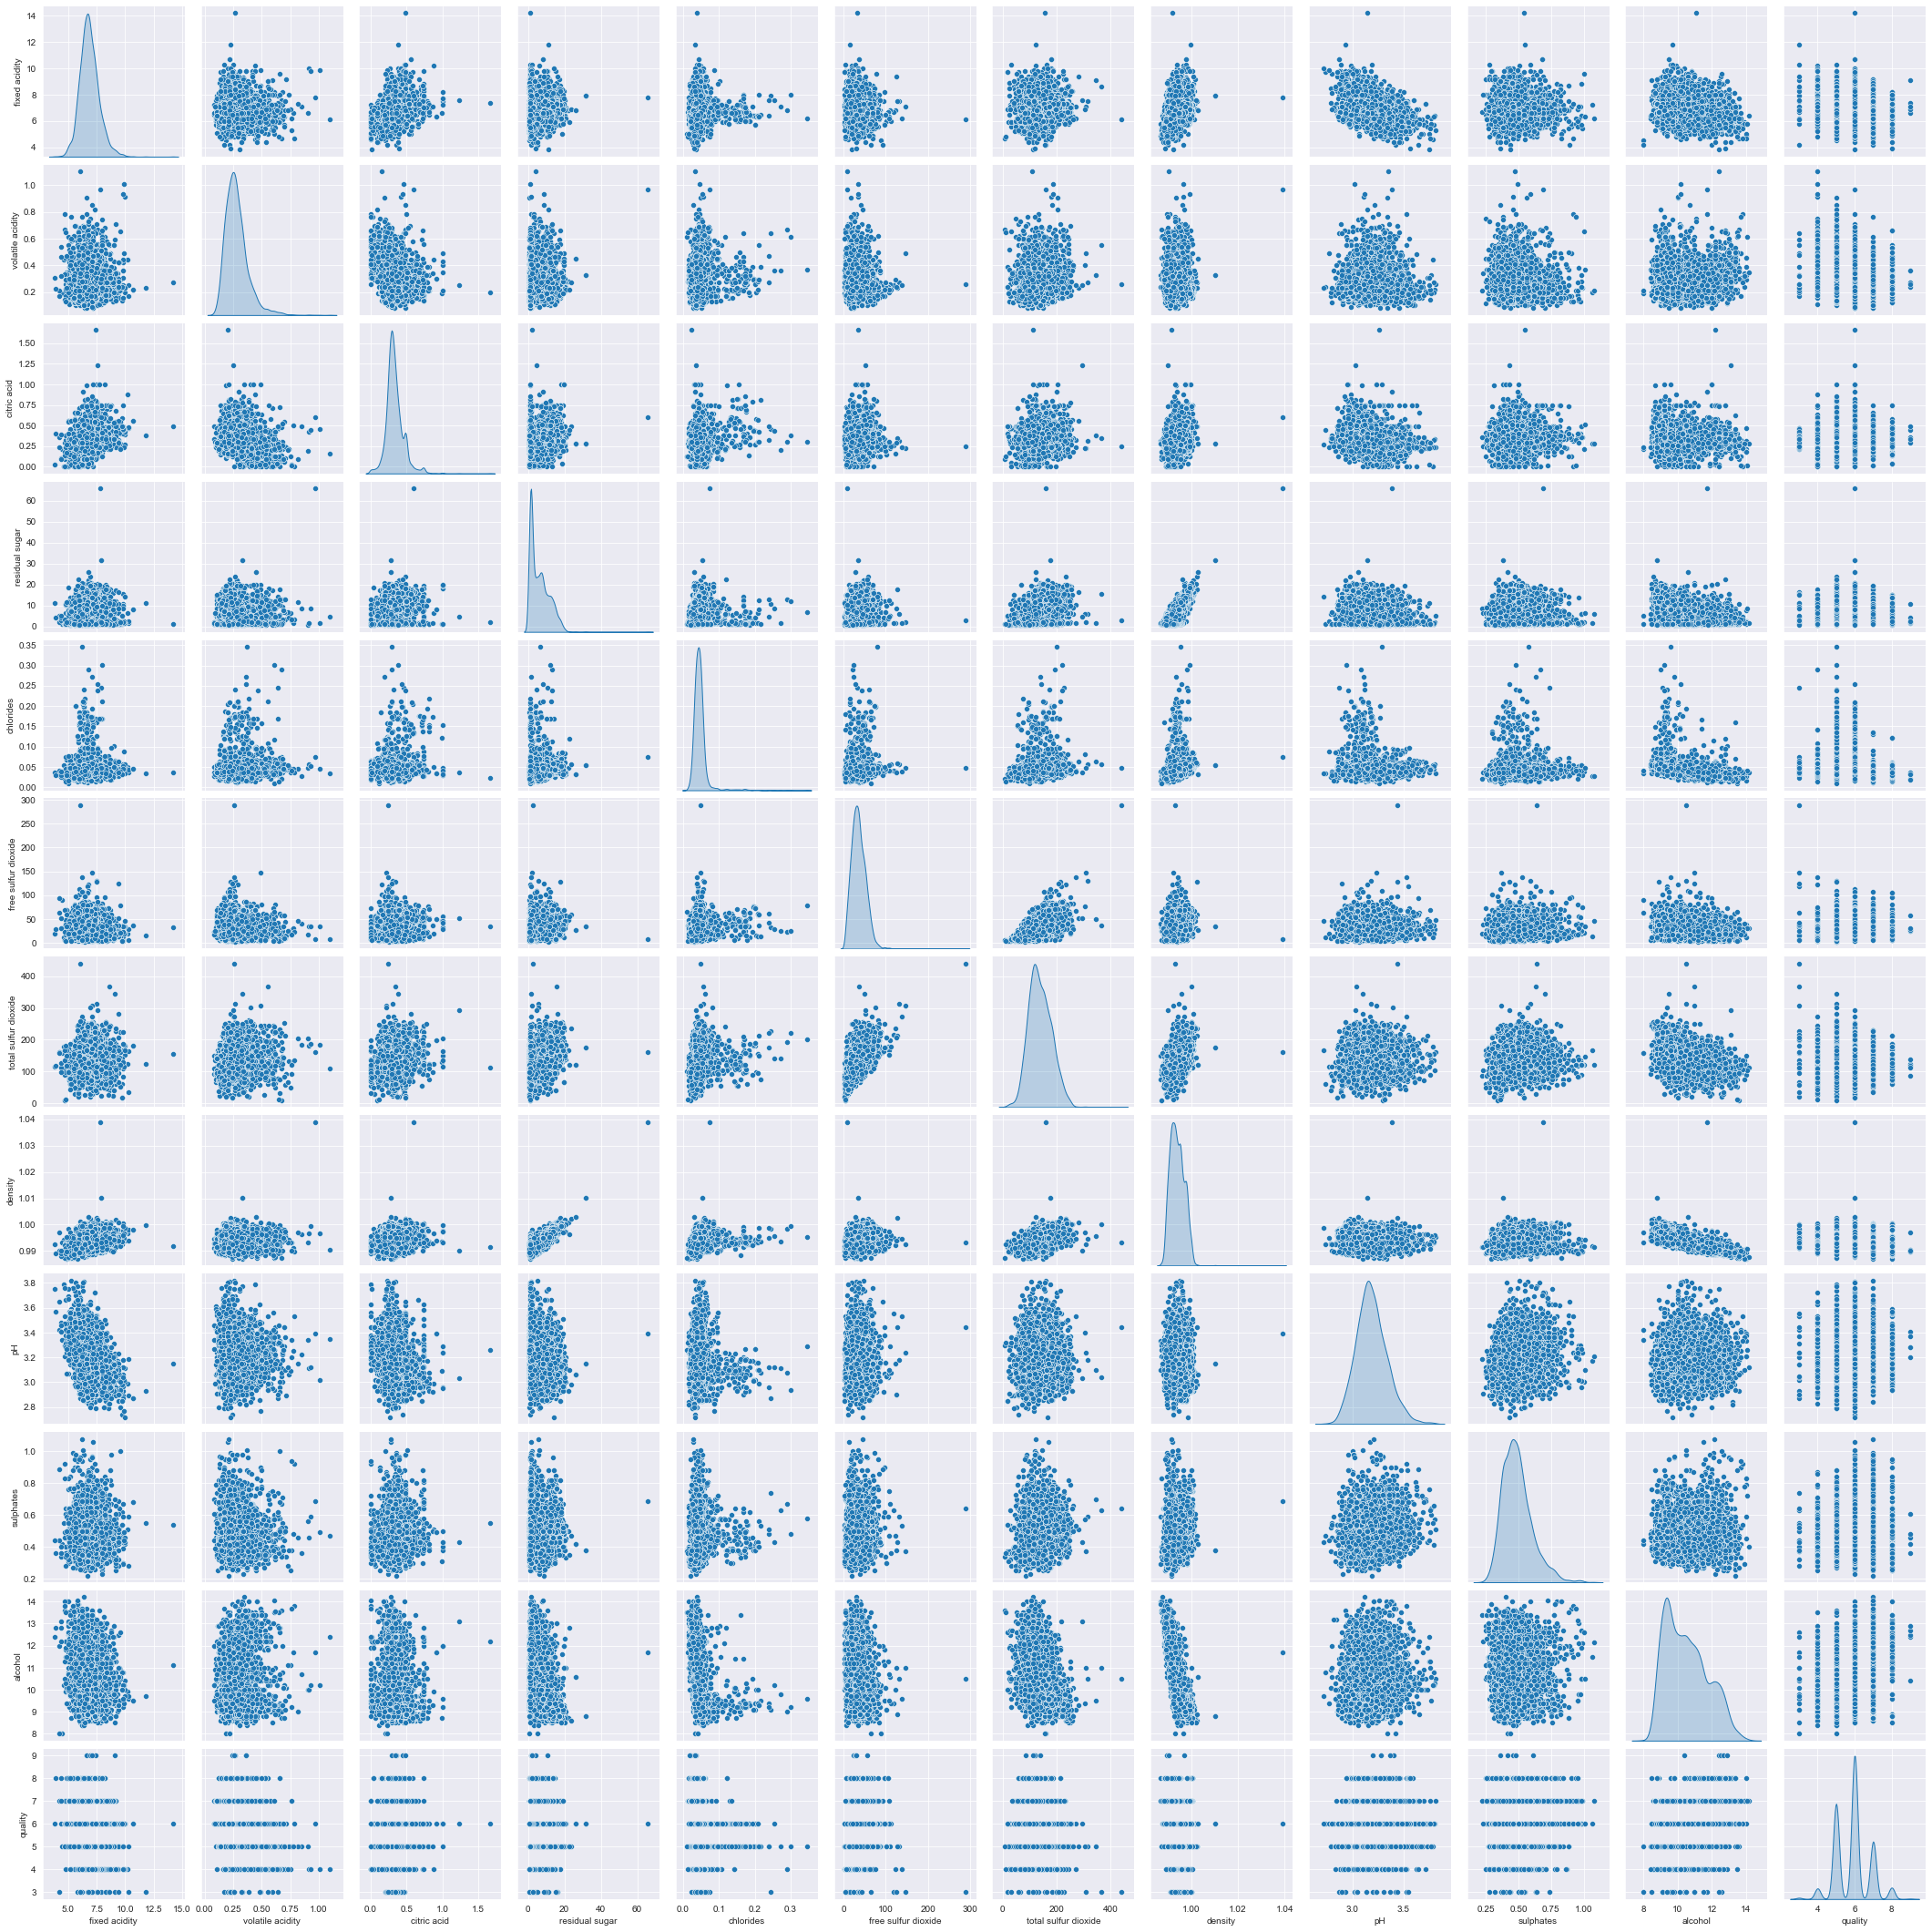

In [79]:
sns.set_style("darkgrid")

g = sns.pairplot(wine,diag_kind="kde")
plt.show()

In [118]:
#Dvide dataframe to explanatory variables and objective variable (y:quality and X:others)
X_wine = wine.drop("quality",axis=1)
#Replace y:quality to boolean, and then to binary 
y_wine = wine["quality"]>=7
y_wine = y_wine.replace({True:1,False:0})

display(X_wine.head())
print(y_wine.head(20))
print(y_wine.sum())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
15    1
16    0
17    1
18    0
19    0
Name: quality, dtype: int64
1060


In [91]:
#Normalize data with Z-score
X_wine['fixed acidity'] = (X_wine['fixed acidity']-X_wine['fixed acidity'].mean())/X_wine['fixed acidity'].std()
X_wine['volatile acidity'] = (X_wine['volatile acidity']-X_wine['volatile acidity'].mean())/X_wine['volatile acidity'].std()
X_wine['citric acid'] = (X_wine['citric acid']-X_wine['citric acid'].mean())/X_wine['citric acid'].std()
X_wine['residual sugar'] = (X_wine['residual sugar']-X_wine['residual sugar'].mean())/X_wine['residual sugar'].std()
X_wine['chlorides'] = (X_wine['chlorides']-X_wine['chlorides'].mean())/X_wine['chlorides'].std()
X_wine['free sulfur dioxide'] = (X_wine['free sulfur dioxide']-X_wine['free sulfur dioxide'].mean())/X_wine['free sulfur dioxide'].std()
X_wine['total sulfur dioxide'] = (X_wine['total sulfur dioxide']-X_wine['total sulfur dioxide'].mean())/X_wine['total sulfur dioxide'].std()
X_wine['density'] = (X_wine['density']-X_wine['density'].mean())/X_wine['density'].std()
X_wine['pH'] = (X_wine['pH']-X_wine['pH'].mean())/X_wine['pH'].std()
X_wine['sulphates'] = (X_wine['sulphates']-X_wine['sulphates'].mean())/X_wine['sulphates'].std()
X_wine['alcohol'] = (X_wine['alcohol']-X_wine['alcohol'].mean())/X_wine['alcohol'].std()

display(X_wine.head(10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152
5,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633
6,-0.775936,0.414297,-1.439364,0.119988,-0.035351,-0.312109,-0.055547,0.291759,-0.054746,-0.173903,-0.742932
7,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010
8,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192
9,1.475600,-0.577820,0.791676,-0.964385,-0.081122,-0.429707,-0.220261,-0.076023,0.210154,-0.349149,0.394706


In [92]:
#Dvide data into training, validation, test data set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_wine, y_wine, random_state=0, train_size=3750)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1, train_size=2500)
print(wine.shape)
print(X_train.shape , X_valid.shape, X_test.shape , y_train.shape , y_valid.shape, y_test.shape)

(4898, 12)
(2500, 11) (1250, 11) (1148, 11) (2500,) (1250,) (1148,)


In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

kn = KNeighborsClassifier(n_neighbors=3)  #Trial run with k=3
kn.fit(X_train, y_train)
kn_score = kn.score(X_train, y_train)
print('3-nearest neighbor score for training dataset:{:.3f}'.format(kn_score))
kn_score = kn.score(X_valid, y_valid)
print('3-nearest neighbor score for validation dataset:{:.3f}'.format(kn_score))
kn_score = kn.score(X_test, y_test)
print('3-nearest neighbor score for test dataset:{:.3f}'.format(kn_score))

y_test_pred = kn.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
print('\nConfusion Matrix of 3-nearest neighbor for test dataset')
display(pd.DataFrame(cm))

3-nearest neighbor score for training dataset:0.910
3-nearest neighbor score for validation dataset:0.838
3-nearest neighbor score for test dataset:0.808

Confusion Matrix of 3-nearest neighbor for test dataset


,0,1
0,799,99
1,121,129


In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
list_nn=[1,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
score1_train=[]  #score1: accuracy score =(TP+TN)/(TP+TN+FP+FN)
score1_valid=[]
score1_test=[]
score2_train=[]  #score2: precision score =TP/(TP+FP)
score2_valid=[]
score2_test=[]
score3_train=[]  #score3: recall score (sensitivity) =TP/(TP+FN)
score3_valid=[]
score3_test=[]
score4_train=[]  #score4: f1 score = 2/(1/precision + 1/recall)
score4_valid=[]
score4_test=[]

for k in list_nn:
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    
    y_train_pred = knc.predict(X_train)
    y_valid_pred = knc.predict(X_valid)
    y_test_pred = knc.predict(X_test)
    
    score1_train.append(accuracy_score(y_train, y_train_pred))
    score1_valid.append(accuracy_score(y_valid, y_valid_pred))
    score1_test.append(accuracy_score(y_test, y_test_pred))

    score2_train.append(precision_score(y_train, y_train_pred))
    score2_valid.append(precision_score(y_valid, y_valid_pred))
    score2_test.append(precision_score(y_test, y_test_pred))

    score3_train.append(recall_score(y_train, y_train_pred))
    score3_valid.append(recall_score(y_valid, y_valid_pred))    
    score3_test.append(recall_score(y_test, y_test_pred))
    
    score4_train.append(f1_score(y_train, y_train_pred))
    score4_valid.append(f1_score(y_valid, y_valid_pred))
    score4_test.append(f1_score(y_test, y_test_pred))
    

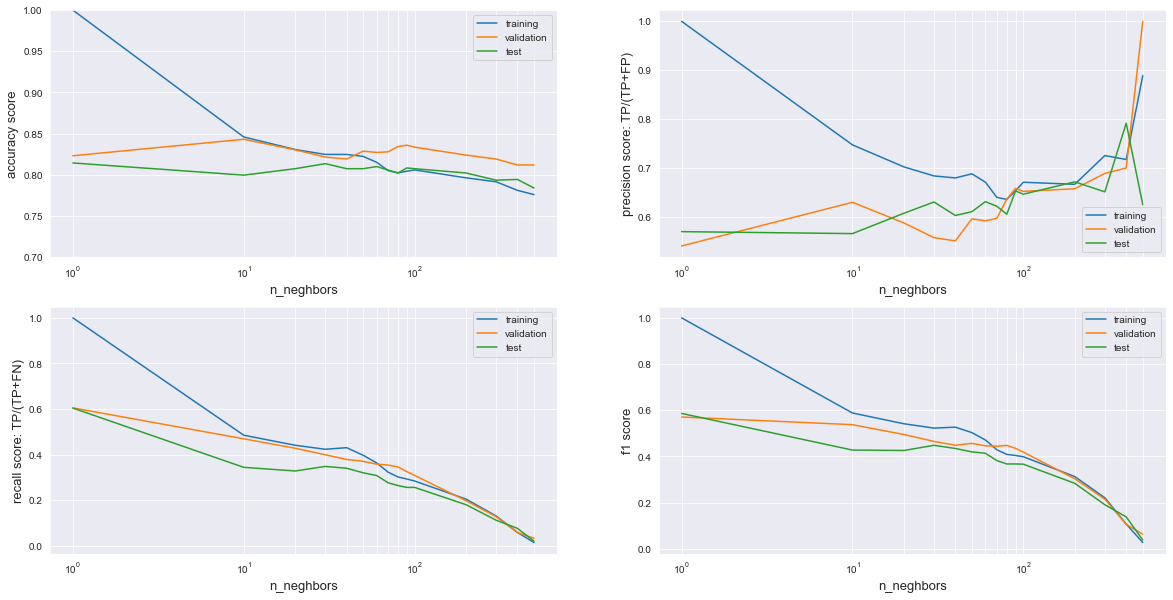

In [107]:
fig = plt.figure(figsize=(20,10))
sns.set_style("darkgrid")

ax1 = fig.add_subplot(2,2,1)
ax1.set_ylim(0.7,1.0)
ax1.set_xscale('log')
ax1.set_xticks(list_nn)
ax1.set_xlabel("n_neghbors",fontsize=13)
ax1.set_ylabel("accuracy score",fontsize=13)
ax1.plot(list_nn,score1_train, label='training')
ax1.plot(list_nn,score1_valid, label='validation')
ax1.plot(list_nn,score1_test, label='test')
ax1.legend()
ax1.grid(True)

ax2 = fig.add_subplot(2,2,2)
#ax2.set_ylim(0.7,1.0)
ax2.set_xscale('log')
ax2.set_xticks(list_nn)
ax2.set_xlabel("n_neghbors",fontsize=13)
ax2.set_ylabel("precision score: TP/(TP+FP)",fontsize=13)
ax2.plot(list_nn, score2_train, label='training')
ax2.plot(list_nn, score2_valid, label='validation')
ax2.plot(list_nn, score2_test, label='test')
ax2.legend()
ax2.grid(True)

ax3 = fig.add_subplot(2,2,3)
#ax3.set_ylim(0.7,1.0)
ax3.set_xscale('log')
ax3.set_xticks(list_nn)
ax3.set_xlabel("n_neghbors",fontsize=13)
ax3.set_ylabel("recall score: TP/(TP+FN)",fontsize=13)
ax3.plot(list_nn, score3_train, label='training')
ax3.plot(list_nn, score3_valid, label='validation')
ax3.plot(list_nn, score3_test, label='test')
ax3.legend()
ax3.grid(True)

ax4 = fig.add_subplot(2,2,4)
#ax4.set_ylim(0.7,1.0)
ax4.set_xscale('log')
ax4.set_xticks(list_nn)
ax4.set_xlabel("n_neghbors",fontsize=13)
ax4.set_ylabel("f1 score",fontsize=13)
ax4.plot(list_nn, score4_train, label='training')
ax4.plot(list_nn, score4_valid, label='validation')
ax4.plot(list_nn, score4_test, label='test')
ax4.legend()
ax4.grid(True)

plt.show()

In [122]:
from sklearn.metrics import roc_auc_score